### モジュール定義

In [1]:
module DiscreteFrechet

using Plots

struct Point
    x::Float16
    y::Float16
end
export Point

const Curve = Array{Point, 1}
export Curve

function Base.show(io::IO, p::Point)
    println(io, "($(p.x), $(p.y))")
end

function Base.show(io::IO, curve::Curve)
    for (ip, p) in enumerate(curve)
        print(io, "($(p.x), $(p.y))")
        ip < length(curve) && print("--")
    end
    println(io)
end

dist(p1::Point, p2::Point) = sqrt((p1.x - p2.x) ^ 2 + (p1.y - p2.y) ^ 2)
export dist


function plot_curve(lcurve; xlim=[0.0, 2.0], ylim=[0.0, 2.0])
    p = plot(size=(500, 500), leg=false, xlims=xlim, ylims=ylim)
    
    for curve in lcurve
        xs = [p.x for p in curve]
        ys = [p.y for p in curve]


        for i in 1:length(curve)-1
            pi, pj = curve[i:i+1]
            plot!([pi.x, pj.x], [pi.y, pj.y], alpha=0.3, lw=3, color=:black, z=0)
        end

        plot!(xs, ys, seriestype=:scatter, color=:red, z=1)
    end
    
    p
end
export plot_curve

function plot_curve_with_alignment(c1, c2; xlim=[0.0, 2.0], ylim=[0.0, 2.0])
    p = plot(size=(500, 500), leg=false, xlims=xlim, ylims=ylim)
    
    for curve in [c1, c2]
        xs = [p.x for p in curve]
        ys = [p.y for p in curve]


        for i in 1:length(curve)-1
            pi, pj = curve[i:i+1]
            plot!([pi.x, pj.x], [pi.y, pj.y], alpha=0.3, lw=3, color=:black, z=0)
        end

        plot!(xs, ys, seriestype=:scatter, color=:red, z=1)
    end
    
    d, assign = dF(c1, c2)
    println(assign)
    
    for (i, j) in assign
        pi = c1[i]
        pj = c2[j]
        println(pi, ":", pj)
        plot!([pi.x, pj.x], [pi.y, pj.y], alpha=0.3, lw=1, color=:black, z=0)
    end
    
    p
end
export plot_curve_with_alignment

function dF(P, Q)
    D = zeros(length(P), length(Q))
    D .= -1
    
    # (1, 1)
    D[1, 1] = dist(P[1], Q[1])
    
    # 1-column
    for i in 2:length(P)
        D[i, 1] = max(D[i - 1, 1], dist(P[i], Q[1])) 
    end
    
    # 1-row
    for j in 2:length(Q)
        D[1, j] = max(D[1, j - 1], dist(P[1], Q[j]))
    end
    
    # (i, j)
    for i in 2:length(P), j in 2:length(Q)
        D[i, j] = max(
            min(D[i - 1, j], D[i - 1, j - 1], D[i, j - 1]),
            dist(P[i], Q[j])
        )
    end
    
    # backtracking
    list = Tuple{Int, Int}[(length(P), length(Q))]
    while true
        cur = list[end]
        up = (cur[1], cur[2] - 1)
        left = (cur[1] - 1, cur[2])
        upleft = (cur[1] - 1, cur[2] - 1)   
        selected = nothing
        selected_value = Inf
        for p in [up, left, upleft]
            if 1 <= p[1] <= length(P) && 1 <= p[2] <= length(Q)
                if D[p[1], p[2]] < selected_value
                    selected_value = D[p[1], p[2]]
                    selected = p
                end
            end
        end
        push!(list, selected)
        selected == (1, 1) && break
    end

    # display(D)
    D[length(P), length(Q)], list
end
export dF


end

using Main.DiscreteFrechet

In [2]:
p1 = Point(0.5, 1.5)
p2 = Point(0.7, 1.5)
p3 = Point(1.0, 1.8)
curve = [p1, p2, p3]
curve2 = [Point(0.3, 1.2), Point(0.5, 1.0), Point(0.9, 1.1), Point(1.1, 1.5)]
println(curve)

p1 = Point(0.0, 0.0)
p2 = Point(0.0, 1.0)
p3 = Point(1.0, 1.0)
println(dist(p1, p2))
println(dist(p1, p3))

(0.5, 1.5)--(0.7, 1.5)--(1.0, 1.8)

1.0
1.414


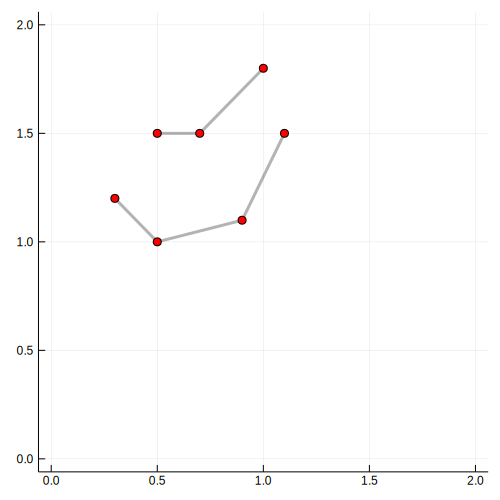

In [3]:
fig = plot_curve([curve, curve2])
fig

### Frechet 例題

In [4]:
P = [Point(1, 1), Point(2, 1), Point(2, 2)]
Q = [Point(2, 2), Point(0, 1), Point(2, 4)]
println(dF(P, Q))

(2.0, Tuple{Int64,Int64}[(3, 3), (2, 2), (2, 1), (1, 1)])


In [5]:
P = [Point(1, 1), Point(2, 1), Point(2, 2)]
Q = [Point(1, 1), Point(2, 1), Point(2, 2)]
println(dF(P, Q))

(0.0, Tuple{Int64,Int64}[(3, 3), (2, 2), (1, 1)])


### alignment

Tuple{Int64,Int64}[(3, 4), (2, 4), (2, 3), (1, 2), (1, 1)]
(1.0, 1.8)
:(1.1, 1.5)

(0.7, 1.5)
:(1.1, 1.5)

(0.7, 1.5)
:(0.9, 1.1)

(0.5, 1.5)
:(0.5, 1.0)

(0.5, 1.5)
:(0.3, 1.2)



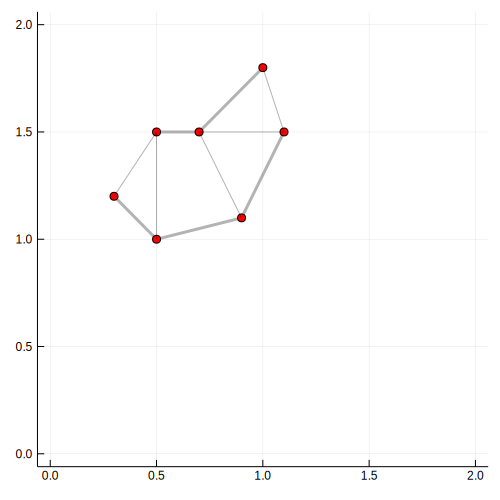

In [6]:
plot_curve_with_alignment(curve, curve2)